# This notebook is Exploratory Data Analysis and Building ML MODELS Date - 11/04/20

The code cell contains all the necessary imports for this file

In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
import re
file_name = "reddit_flair_data.csv"
%matplotlib inline

We load in the reddit_flair_data.csv file and have a look at the first 5 samples of it

In [5]:
df = pd.read_csv(file_name)
df.head()

,id,flair,title,body,num_cmnts,created,score,comments
0,fwjdqr,AskIndia,4 days ago we had pending orders of 100 millio...,we are getting frantic calls from our pharma ...,6,2020-04-08 01:37:04,94,modi has stockholm syndrome to be fair the ev...
1,fizkkk,AskIndia,randians who were big time users of dating app...,i d my own stint with these apps a couple of m...,19,2020-03-16 00:18:06,20,someone matched with me just to tell me that ...
2,f25vx0,AskIndia,what does r india thinks about the flat earthers,i encountered a foreigner in ig who says round...,31,2020-02-11 22:40:55,4,i haven t found a indian yet who believes ear...
3,dtvliq,AskIndia,people who left their 9 to 5 jobs to pursue a ...,couldn t add askindia flair from the mobile br...,34,2019-11-10 02:27:35,44,an engineer doing advertisement shoots since ...
4,b7pvwt,AskIndia,somebody want to kill my full family what to do,it s now 24hrs but local police station is not...,24,2019-04-01 06:30:35,94,calm down go to the sp office of your town fi...


Here I combined all the text from the title,body and comments as a single entity to work on their combinations

In [33]:
def combined_features(df):
    '''
    takes in the dataframe object and returns the new dataframe which has the column of combined features
    '''
    combined = ' '
    combined_list=[]
    titles = list(df['title'])
    bodys = list(df['body'])
    comments = list(df['comments'])
    for i in range(len(titles)):
        combined = re.sub('[0-9]','',combined + str(titles[i]) + str(bodys[i]) + str(comments[i]))
        combined_list.append(combined)
        combined = ' ' 
    df['combined_features'] = combined_list
    return df
df = combined_features(df)

In [36]:
df

,id,flair,title,body,num_cmnts,created,score,comments,combined_features
0,fwjdqr,AskIndia,4 days ago we had pending orders of 100 millio...,we are getting frantic calls from our pharma ...,6,2020-04-08 01:37:04,94,modi has stockholm syndrome to be fair the ev...,days ago we had pending orders of million h...
1,fizkkk,AskIndia,randians who were big time users of dating app...,i d my own stint with these apps a couple of m...,19,2020-03-16 00:18:06,20,someone matched with me just to tell me that ...,randians who were big time users of dating ap...
2,f25vx0,AskIndia,what does r india thinks about the flat earthers,i encountered a foreigner in ig who says round...,31,2020-02-11 22:40:55,4,i haven t found a indian yet who believes ear...,what does r india thinks about the flat earth...
3,dtvliq,AskIndia,people who left their 9 to 5 jobs to pursue a ...,couldn t add askindia flair from the mobile br...,34,2019-11-10 02:27:35,44,an engineer doing advertisement shoots since ...,people who left their to jobs to pursue a c...
4,b7pvwt,AskIndia,somebody want to kill my full family what to do,it s now 24hrs but local police station is not...,24,2019-04-01 06:30:35,94,calm down go to the sp office of your town fi...,somebody want to kill my full family what to ...
...,...,...,...,...,...,...,...,...,...
2195,fzvi3k,Food,rise of india praising youtube channels,from few months i am noticing something on you...,21,2020-04-13 01:29:59,25,they are just using indian population for mon...,rise of india praising youtube channelsfrom f...
2196,fs6ggv,Food,plan source in comments,NaN,13,2020-03-31 18:04:34,283,haven t even seen amit shah since long his pr...,plan source in comments nan haven t even seen...
2197,faqinz,Food,cake sponges being delivered to a bakery in noida,NaN,78,2020-02-28 20:02:34,545,this is the bakery https www zomato com ncr f...,cake sponges being delivered to a bakery in n...
2198,drvs1m,Food,chennai food delivery boys thrash customer aft...,NaN,21,2019-11-05 20:46:01,120,bas yahi baki thha on the day of the incident...,chennai food delivery boys thrash customer af...


Let's see the distribution of each label(flair) in the dataset

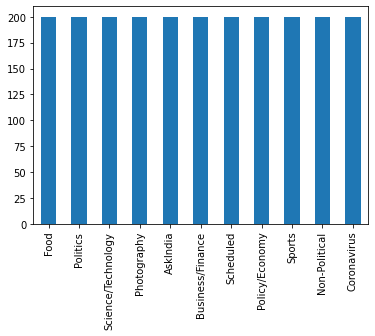

In [37]:
df['flair'].value_counts().plot(kind='bar')

In [44]:
stopwords = set(STOPWORDS)
def makeWordCloud(textList,stopwords):
    '''
    This function is used to make a wordcloud. 
    It takes two argument one is the list of the texts whose word cloud is to be seen and second is the list of stopwords
    We will use it to see all the words in different flairs
    '''
    words  =' '
    for val in textList: 
        #split each word in the sentences
        tokens = val.split() 
      
        # Convert each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        
        #appending words in string
        for word in tokens: 
            words = words + word + ' '
  
  
    wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
    return wordcloud


In [43]:
flairs = [
    'AskIndia','Non-Political','Scheduled','Photography','Coronavirus',
    'Science/Technology','Politics','Business/Finance','Policy/Economy','Sports','Food'
]

wordCloudDict = {}

for flair in flairs:
    wordCloudDict[flair] = None
    
df_dict = wordCloudDict

for flair in flairs:
    df_dict[flair] = df[df['flair']==flair]